# Supervised Machine Learning - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


## Context
Portuguese Bank Marketing Data Set obtained from University of California, Irvine (UCI) Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data was collected from a direct marketing campaign conducted by Portuguese banking institution to offer term deposits. The data collection was made by phone calls to potential customer from May 2008 to November 2010. 

<b>bank client data:</b><br>
* 1 - age (numeric)<br>
* 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
* 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
* 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
* 5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
* 6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
* 7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>

<b>related with the last contact of the current campaign:</b><br>
* 8 - contact: contact communication type (categorical: "cellular","telephone")<br>
* 9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")<br>
* 10 - dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

<b>other attributes:</b><br>
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
* 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>

<b>social and economic context attributes</b><br>
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
* 20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

<b>Output variable (desired target):</b><br>
* 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
bank = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

> First of all we need to prepare our dataframe before we proceed with supervised machine learning. In this case we will do predictive classification.

In [3]:
# Based on the information obtained from the dataset, in order to have a realistic model, we need to drop 'duration' column

bank_ml = bank.copy()
bank_ml.drop('duration', axis = 1, inplace = True)

Based on the information obtained from the dataset, and also during EDA, there are columns containing information from previous campaign (pdays and poutcome), and one column containing the contacts performed before the current campaign. Since they are correlated highly with each other, and I also want to do a prediction not mainly based on previous information, <b>I decided to keep 'previous' column, and dropping poutcome and pdays.</b> Other consideration about why I chose to drop those columns:

* 96% of consumers were not contacted in previous campaign (based on pdays column)
* 86% of consumers did not have any prior relation to the previous campaign or before current campaign (poutcome : nonexistent and previous : 0) -- see below that if previous = 0, then the poutcome is obviously nonexistent.
* From EDA we saw that poutcome and pdays are highly correlated with other features

In [6]:
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [7]:
bank['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [8]:
bank[(bank['previous'] == 0) & (bank['poutcome']== 'nonexistent')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
# Dropping poutcome and pdays
bank_ml.drop(['poutcome', 'pdays'], axis = 1, inplace = True)

### Correlation

In [10]:
bank_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 5.7+ MB


In [5]:
numcol = bank_ml.select_dtypes('number').columns
catcol = bank_ml.select_dtypes('object').columns

Text(0.5, 1.0, 'Correlation among Numerical Features')

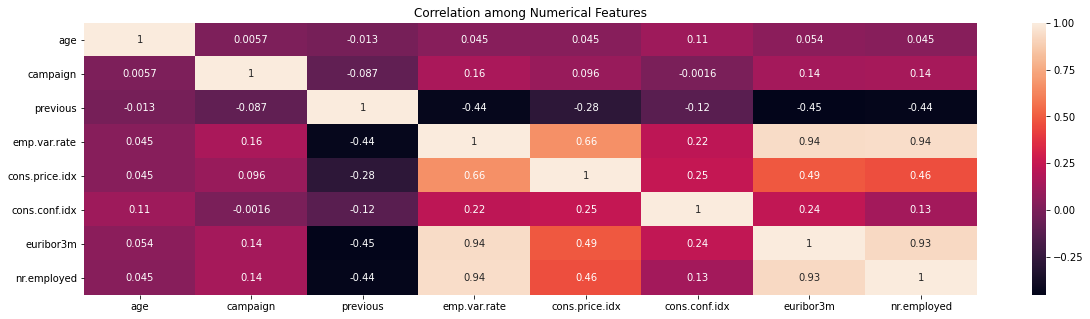

In [12]:
#From EDA as well we know that none of the numerical features are following normal distribution
plt.figure(figsize = (20,5))
sns.heatmap(bank_ml[numcol].corr(method = 'spearman'), annot =True)
plt.title('Correlation among Numerical Features')

> We saw this already in EDA, socio-economic features such as emp.var.rate, euribor3m and nr.employed are highly correlated with each other

In [6]:
#Let's measure the correlation of categorical features using cramer's V
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [7]:
corr_cat = []
for i in catcol:
    temp = []
    for j in catcol:
        temp.append(cramers_v(bank_ml[i], bank_ml[j]))
    corr_cat.append(temp)    

In [8]:
corr_cat_res = pd.DataFrame(corr_cat, index = catcol, columns = catcol)

Text(0.5, 1.0, 'Correlation among Categorical Features')

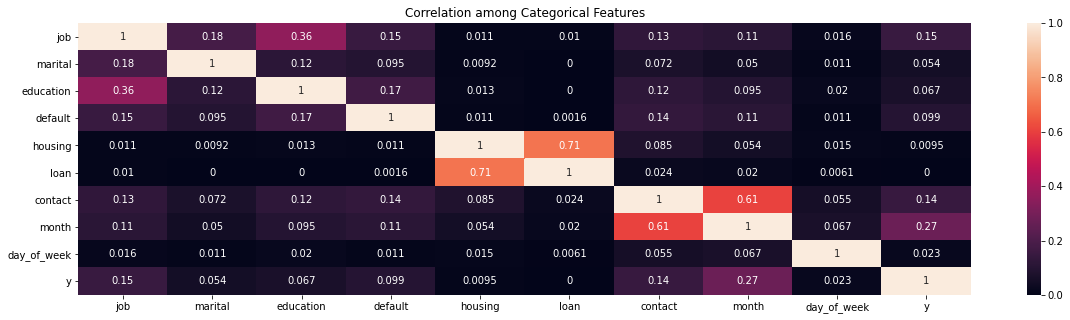

In [16]:
plt.figure(figsize = (20,5))
sns.heatmap(corr_cat_res, annot = True)
plt.title('Correlation among Categorical Features')

> Here we can observe that housing and loan are correlated with each other -- and based on EDA we know that there are people with unknown type in both of features (later when we make dummies, we will drop one). Contact and month are correlated with each other, because in some months there is a particular contact type performed the most over the other type. Contact and month also have slight correlation with the target.

In [9]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [10]:
corr_num_cat = []
for i in numcol:
    temp = []
    for j in catcol:
        temp.append(correlation_ratio(bank_ml[j], bank_ml[i]))
    corr_num_cat.append(temp)    

In [11]:
corr_numcat_res = pd.DataFrame(corr_num_cat, index = numcol, columns = catcol)

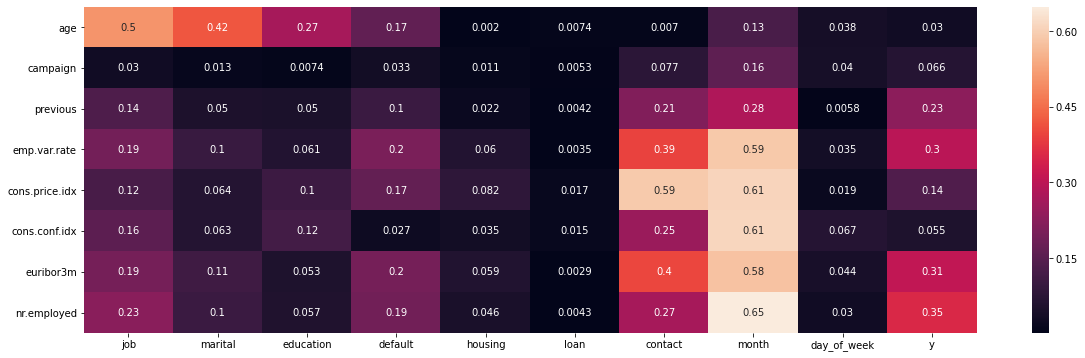

In [20]:
plt.figure(figsize = (20,6))
sns.heatmap(corr_numcat_res, annot = True)

> Here we see the correlation among the numerical features with categorical features, including the target. Socio-economic features such as emp.var.rate, euribor3m and nr.employed have quite the same correlation ratio with the target.  Since they are highly correlated with each other and having this kind of relationship with the target, I am cosidering to drop the columns emp.var.rate and nr.employed. Another thing to back this up is there is no further explanation about those two features. Thus I will keep euribor3m. Month is correlated with most socio-economic features, because some of the features are monthly based or quarterly based.

In [12]:
bank_ml.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace = True)

In [13]:
bank_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
previous          41188 non-null int64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
y                 41188 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 5.0+ MB


## Preparing the dataset

After dropping some of features, we end up with 16 columns: 6 numerical, 10 categorical (including the target). Let's see the categorical features description.

In [23]:
bank_ml[catcol].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,36548


In [24]:
# In jobs we could not really merge some of the types because they are quite distinct
# There is also a really broad job sector such as services
# For now we will just keep it like this
bank_ml['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [25]:
# In education there are 3 types with 'basic' education
# Based on EDA, they are the bottom 3 for the percentage of customers acquired 
# Thus to reduce the type here, I will encode the basic.4y, basic.6y and basic.9y into 'basic-education'

bank_ml['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [14]:
edu = []

for i in bank['education']:
    if (i == 'basic.4y') or (i == 'basic.6y') or (i == 'basic.9y'):
        edu.append('basic')
    else:
        edu.append(i)

In [27]:
edu

['basic',
 'high.school',
 'high.school',
 'basic',
 'high.school',
 'basic',
 'professional.course',
 'unknown',
 'professional.course',
 'high.school',
 'unknown',
 'high.school',
 'high.school',
 'basic',
 'basic',
 'basic',
 'basic',
 'basic',
 'basic',
 'basic',
 'high.school',
 'basic',
 'high.school',
 'high.school',
 'high.school',
 'university.degree',
 'unknown',
 'basic',
 'university.degree',
 'university.degree',
 'unknown',
 'unknown',
 'unknown',
 'basic',
 'basic',
 'basic',
 'high.school',
 'basic',
 'university.degree',
 'basic',
 'university.degree',
 'high.school',
 'professional.course',
 'university.degree',
 'university.degree',
 'professional.course',
 'university.degree',
 'basic',
 'university.degree',
 'basic',
 'high.school',
 'basic',
 'high.school',
 'professional.course',
 'basic',
 'professional.course',
 'university.degree',
 'high.school',
 'professional.course',
 'university.degree',
 'university.degree',
 'basic',
 'basic',
 'basic',
 'high.school',


In [28]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
bank_ml['education'] = edu

In [30]:
bank_ml.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,93.994,-36.4,4.857,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,93.994,-36.4,4.857,no


In [16]:
# updating the numcol and catcol
numcol = bank_ml.select_dtypes('number').columns
catcol = bank_ml.select_dtypes('object').columns

### Hypothesis Testing
Let's do the significant check for both out numerical and categorical features

In [32]:
numcol

Index(['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m'],
      dtype='object')

In [17]:
# We did this already in the EDA, but it's nice to put it here again
# We know they are all not following normal distribution, thus directly using Mann Whitney U
# Numerical columns

from scipy.stats import mannwhitneyu
mann = []
for i in numcol:
    if mannwhitneyu(bank_ml[bank_ml['y'] == 'yes'][i], 
                    bank_ml[bank_ml['y'] == 'no'][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [numcol, mann]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,age,Reject Null Hypothesis
1,campaign,Reject Null Hypothesis
2,previous,Reject Null Hypothesis
3,cons.price.idx,Reject Null Hypothesis
4,cons.conf.idx,Reject Null Hypothesis
5,euribor3m,Reject Null Hypothesis


> Here we see that all the numerical features are significant for our target

> We continue to check the significance of the categorical columns.
* For categorical column, we need to convert them into dummies first, because we still need 'number' to check the significance and later for predictive analysis

In [34]:
catcol

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'y'],
      dtype='object')

In [18]:
# Categorical column
bank_dummies = bank_ml.drop('y', axis = 1)

In [36]:
bank_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,93.994,-36.4,4.857
3,40,admin.,married,basic,no,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,93.994,-36.4,4.857


In [19]:
dum_catcol = bank_dummies.select_dtypes('object').columns
dum_catcol

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object')

In [20]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in dum_catcol:
    if chi2_contingency(pd.crosstab(bank_ml['y'], bank_ml[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

In [21]:
res_cat = pd.DataFrame(data = [dum_catcol, chi2_check] 
             ).T 
res_cat.columns = ['Column', 'Hypothesis']
res_cat

,Column,Hypothesis
0,job,Reject Null Hypothesis
1,marital,Reject Null Hypothesis
2,education,Reject Null Hypothesis
3,default,Reject Null Hypothesis
4,housing,Fail to Reject Null Hypothesis
5,loan,Fail to Reject Null Hypothesis
6,contact,Reject Null Hypothesis
7,month,Reject Null Hypothesis
8,day_of_week,Reject Null Hypothesis


> Here we see that housing and loan are both not significant, so we will only proceed further with the significant features

In [22]:
check = {}
for i in res_cat[res_cat['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(bank_ml[i])
    bon_p_value = 0.05/bank_ml[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(bank_ml['y'], dummies[series]))[1] < bon_p_value:
            check['{}_{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}_{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'

In [23]:
res_chi = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi.columns = ['Pair', 'Hypothesis']
res_chi

,Pair,Hypothesis
0,job_admin.,Reject Null Hypothesis
1,job_blue-collar,Reject Null Hypothesis
2,job_entrepreneur,Reject Null Hypothesis
3,job_housemaid,Fail to Reject Null Hypothesis
4,job_management,Fail to Reject Null Hypothesis
5,job_retired,Reject Null Hypothesis
6,job_self-employed,Fail to Reject Null Hypothesis
7,job_services,Reject Null Hypothesis
8,job_student,Reject Null Hypothesis
9,job_technician,Fail to Reject Null Hypothesis


In [24]:
res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']

,Pair,Hypothesis
0,job_admin.,Reject Null Hypothesis
1,job_blue-collar,Reject Null Hypothesis
2,job_entrepreneur,Reject Null Hypothesis
5,job_retired,Reject Null Hypothesis
7,job_services,Reject Null Hypothesis
8,job_student,Reject Null Hypothesis
10,job_unemployed,Reject Null Hypothesis
13,marital_married,Reject Null Hypothesis
14,marital_single,Reject Null Hypothesis
16,education_basic,Reject Null Hypothesis


In [25]:
significant_chi = []
for i in res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    significant_chi.append(i)

In [26]:
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Columns']:
    significant_chi.append(i)

In [27]:
bank_dummies = pd.get_dummies(bank_dummies)

In [28]:
bank_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
age                              41188 non-null int64
campaign                         41188 non-null int64
previous                         41188 non-null int64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed       

In [29]:
banksig = bank_dummies[significant_chi].copy()

In [48]:
banksig.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic,education_university.degree,education_unknown,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,56,1,0,93.994,-36.4,4.857
1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,57,1,0,93.994,-36.4,4.857
2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,37,1,0,93.994,-36.4,4.857
3,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,40,1,0,93.994,-36.4,4.857
4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,56,1,0,93.994,-36.4,4.857


In [49]:
banksig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
job_admin.                     41188 non-null uint8
job_blue-collar                41188 non-null uint8
job_entrepreneur               41188 non-null uint8
job_retired                    41188 non-null uint8
job_services                   41188 non-null uint8
job_student                    41188 non-null uint8
job_unemployed                 41188 non-null uint8
marital_married                41188 non-null uint8
marital_single                 41188 non-null uint8
education_basic                41188 non-null uint8
education_university.degree    41188 non-null uint8
education_unknown              41188 non-null uint8
default_no                     41188 non-null uint8
default_unknown                41188 non-null uint8
contact_cellular               41188 non-null uint8
contact_telephone              41188 non-null uint8
month_apr                      41188 non-null uint8
month_d

In [3]:
target = bank['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [31]:
banksig.to_csv('banksig.csv', index = False)
target.to_csv('target.csv', index = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


> After processing our features, now we have a total of 31 columns (without the target). I also make a variable called target -- our target encoded with number, 0 as the Target No and 1 as the Target Yes.

## Classification Model

Before we start to fit our model, let's see once again out target 

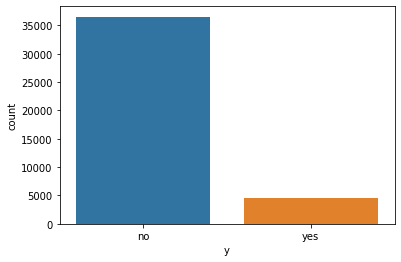

In [56]:
sns.countplot(bank['y'])

In [57]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

> Only 11% of Target Yes, indicating a class imbalance. This will probably influence our model, to predict No more often and encounter difficulties in finding the Target Yes. Let's see if the class imbalance will really disturb our model. If that is the case, then we need to think of other solutions, such as applying undersampling or oversampling, to balance the classes of our target.

> We also need to choose the right metrics to evaluate our model later. In a class imbalance case, accuracy might not be the best one -- we want to predict the True case accurately. Since our dataset has over 80% of Target No, I am afraid that our model will prefer to predict No instead of Yes. Therefore, I think we need to pick precision and recall, to make sure that our model correctly predicting the Target Yes. 

* A higher score in recall for Target Yes is more desired for aggresive type of bank, because it indicates a lower False Negative (cases which are actually positive, but predicted negative). Since we have much smaller case of Target Yes, finding the true Target Yes is important, because it means we get the customer who will buy the product or in this case putting the deposit in the bank (customer acquisition). If we have a high False Negative, means we missed our customer and bank can probably lost revenue.

* A higher score in precision is also desired (more for the conservative bank type), but it can be tolerated if we have lower precision score than recall score. Low precision score indicates a higher number of False Positive (cases which are actually negative, but predicted positive). Although pursuing False Positive customers can also cost resources and time, but in my opinion for aggresive bank type getting new True customers is more important for bank.

* For now, let's say that we want to maximize the customer acquisition (for aggresive bank strategy). I will show the metrics, but my objection will be more to maximize the f1 score (balance between precision and recall), and if I have to choose further, I will choose the one with bigger recall score.

* <b>Additionally, I will explicitly see the True Positives number from the confusion matrix. Model with biggest True Positives number will be chosen to further steps.</b>


## Preparing the datasets
As I mentioned earlier, I will check using the original dataset, undersampled dataset, oversampled dataset, and also generating synthesic data using SMOTE oversampling method

In [43]:
from sklearn.model_selection import train_test_split

### Original dataset

In [44]:
X_train, X_test, y_train, y_test = train_test_split(banksig, target,
                                                   test_size = 0.3, random_state = 101)

In [45]:
y_train.value_counts()

0    25570
1     3261
Name: y, dtype: int64

In [46]:
y_test.value_counts()

0    10978
1     1379
Name: y, dtype: int64

### Resampled datasets (undersampled and oversampled)

In [47]:
# Preparing the dataset first 
# Only using the X_train and y_train -- because we do not want to leak our test data when fitting into the models

bank_resample = pd.concat([X_train, y_train], axis =1)

In [48]:
# Separating minority and majority class
class_yes = bank_resample[bank_resample['y'] == 1]
class_no = bank_resample[bank_resample['y'] == 0]

In [49]:
from sklearn.utils import resample

#### Undersampled dataset

In [50]:
# We will resample the target No (no_under) -- so the number of Target No and Target Yes will be the same

no_undersampled = resample(class_no,
                          replace = False,
                          n_samples = len(class_yes),
                          random_state = 101)

In [51]:
# combine the yes and no to one dataset
bank_undersampled = pd.concat([no_undersampled, class_yes])

In [52]:
# Checking the dataset
bank_undersampled['y'].value_counts()

1    3261
0    3261
Name: y, dtype: int64

In [53]:
# Generating the X_train_under and y_train_under -- so we will not overwrite our original X_train and y_train
X_train_under = bank_undersampled.drop('y', axis = 1)
y_train_under = bank_undersampled['y']

#### Oversampled dataset

In [54]:
len(class_no)

25570

In [55]:
# We will resample the target Yes (yes_under) -- so the number of Target No and Target Yes will be the same

yes_oversampled = resample(class_yes,
                          replace = True,
                          n_samples = len(class_no),
                          random_state = 101)

In [56]:
bank_oversampled = pd.concat([class_no, yes_oversampled])

In [57]:
bank_oversampled.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic,education_university.degree,education_unknown,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y
7271,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,40,4,0,93.994,-36.4,4.860,0
13284,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,25,1,0,93.918,-42.7,4.962,0
11580,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,48,10,0,94.465,-41.8,4.959,0
31835,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,43,2,0,92.893,-46.2,1.327,0
19551,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,49,1,0,93.444,-36.1,4.968,0


In [58]:
bank_oversampled['y'].value_counts()

1    25570
0    25570
Name: y, dtype: int64

In [59]:
X_train_over = bank_oversampled.drop('y', axis = 1)
y_train_over = bank_oversampled['y']

In [60]:
y_train_over.value_counts()

1    25570
0    25570
Name: y, dtype: int64

### SMOTE Oversampling -- introducing synthetic data to balance the classes

In [61]:
from imblearn.over_sampling import SMOTE
im = SMOTE(sampling_strategy = 'minority')

oversampled_trainX, oversampled_trainY = im.fit_sample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis = 1)

In [62]:
oversampled_train.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic,education_university.degree,education_unknown,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,40,4,0,93.994,-36.4,4.860
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,25,1,0,93.918,-42.7,4.962
2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,48,10,0,94.465,-41.8,4.959
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,43,2,0,92.893,-46.2,1.327
4,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,49,1,0,93.444,-36.1,4.968


In [63]:
oversampled_train['y'].value_counts()

1    25570
0    25570
Name: y, dtype: int64

### Compiling the datasets

In [64]:
X_tr_data = [X_train, X_train_under, X_train_over, oversampled_trainX]
y_tr_data = [y_train, y_train_under, y_train_over, oversampled_trainY]
name_train = ['Original', 'Undersampled', 'Oversampled', 'SMOTE']

## Checking the model 

There are a lot of models for classification case. Here I will try logistic regression, bagging model (Random Forest), and boosting model (XGBoost). First I will check the f1 score without the parameter tuning, and continue only with the one(s) with the best f1 score or recall scores.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [78]:
log_reg = LogisticRegression(solver = 'saga', max_iter = 1000)
rfc = RandomForestClassifier()
xgb = XGBClassifier()

### Compiling Models

In [79]:
models = {'Logistic Regression': log_reg, 'RandomForestClassifier': rfc, 'XGBClassifier': xgb}

In [80]:
for i, j in models.items():
    print(i)
    print(j)

Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
RandomForestClassifier
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
XGBClassifier
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
 

## Fitting the models into the datasets 
### Initial comparison of F1 scores among models and between train/test sets

In [69]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [81]:
for i, j, k in zip(X_tr_data, y_tr_data, name_train):
    print('In {} dataset : '.format(k))
    for m, n in models.items():
        if m == 'Logistic Regression':
            X_trscale = scaler.fit_transform(i)
            n.fit(X_trscale, j)
            X_tsscale = scaler.transform(X_test)
            f1_train = f1_score(j, n.predict(X_trscale))
            f1_test = f1_score(y_test, n.predict(X_tsscale))
            print('F1 Score in {} : '.format(m))
            print('Train : {}'.format(f1_train))
            print('Test : {}'.format(f1_test))
            print(' ')
        else:
            n.fit(i,j)
            f1_train = f1_score(j, n.predict(i))
            f1_test = f1_score(y_test, n.predict(X_test))
            print('F1 Score in {} : '.format(m))
            print('Train : {}'.format(f1_train))
            print('Test : {}'.format(f1_test))
            print(' ')

In Original dataset : 
F1 Score in Logistic Regression : 
Train : 0.30079275198188
Test : 0.30005396654074473
 
F1 Score in RandomForestClassifier : 
Train : 0.9387168847749761
Test : 0.3543968183826779
 
F1 Score in XGBClassifier : 
Train : 0.5803953535765234
Test : 0.36669874879692016
 
In Undersampled dataset : 
F1 Score in Logistic Regression : 
Train : 0.7070809984717269
Test : 0.4195769798327595
 
F1 Score in RandomForestClassifier : 
Train : 0.9900199600798403
Test : 0.37791307999160195
 
F1 Score in XGBClassifier : 
Train : 0.8325327149246314
Test : 0.3968609865470852
 
In Oversampled dataset : 
F1 Score in Logistic Regression : 
Train : 0.7051851851851852
Test : 0.4256397263744616
 
F1 Score in RandomForestClassifier : 
Train : 0.9898919484140816
Test : 0.3984034833091437
 
F1 Score in XGBClassifier : 
Train : 0.832978374836173
Test : 0.4282584884994523
 
In SMOTE dataset : 
F1 Score in Logistic Regression : 
Train : 0.8199440447641886
Test : 0.35916230366492147
 
F1 Score in 

In general, we see that our models are overfitting -- having better train result than test result (in exception of logistic regression model in the original dataset). 
All models performed better in modified datasets, the F1 scores for the test sets are higher compared to the original dataset.

In general, according to the datasets, models performed best in the oversampled dataset. While according to the models, XGBClassifier is the one generating better F1 scores compared to other models. 

## Checking individual models -- classification report and confusion matrix

### Logistic Regression
Since this is considered as a big dataset, I will use 'saga' as the solver for the logistic regression. Based on sklearn documentation, in order to do well with 'saga', we need to scale our data first.

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [65]:
X_trainscale = scaler.fit_transform(X_train)

In [67]:
log_model = LogisticRegression(max_iter = 1000, solver = 'saga')
log_model.fit(X_trainscale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
pred_train = log_model.predict(X_trainscale)

In [86]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     25570
           1       0.58      0.20      0.30      3261

    accuracy                           0.89     28831
   macro avg       0.74      0.59      0.62     28831
weighted avg       0.87      0.89      0.87     28831



In [87]:
print(confusion_matrix(y_train, pred_train))

[[25080   490]
 [ 2597   664]]


In [68]:
X_testscale = scaler.transform(X_test)

In [70]:
predictions = log_model.predict(X_testscale)

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10978
           1       0.59      0.20      0.30      1379

    accuracy                           0.90     12357
   macro avg       0.75      0.59      0.62     12357
weighted avg       0.87      0.90      0.87     12357



In [72]:
print(confusion_matrix(y_test, predictions))

[[10782   196]
 [ 1101   278]]


In [115]:
f1_score(y_test, predictions)

0.30005396654074473

> Here can be observed that the precision and recall of our model predicting the Target No (0) are really high, but it's not the case for the Target Yes. 

* The F1 score for Target Yes is only 0.30, compare to 0.94 for Target No. In general, the recall score is lower than the precision score, indicating higher number of False Negative (case which is True but predicted False). 

* The model seems to predict No more often, since it is only predicting 278 of Target Yes in the test set out of 1379 cases. Moreover, although we fit it into the train set, when we predict the train set -- the model performs poorly.

### Random Forest Classifier
Similarly as model above, we will check the f1 score without tuning the hyperparameter.

In [74]:
rfc = RandomForestClassifier()

In [75]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
rfc_train = rfc.predict(X_train)

In [83]:
print(confusion_matrix(y_train,rfc_train))

[[25501    69]
 [  316  2945]]


In [84]:
print(classification_report(y_train,rfc_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25570
           1       0.98      0.90      0.94      3261

    accuracy                           0.99     28831
   macro avg       0.98      0.95      0.97     28831
weighted avg       0.99      0.99      0.99     28831



In [76]:
rfc_prediction = rfc.predict(X_test)

In [77]:
print(confusion_matrix(y_test,rfc_prediction))

[[10493   485]
 [  959   420]]


In [78]:
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10978
           1       0.46      0.30      0.37      1379

    accuracy                           0.88     12357
   macro avg       0.69      0.63      0.65     12357
weighted avg       0.87      0.88      0.87     12357



In [116]:
f1_score(y_test, rfc_prediction)

0.36777583187390545

> RandomForestClassifier performs better than LogisticRegression, the f1-score for Target Yes is 0.37 -- the number of true prediction of Target Yes is still small, only 420 out of 1379. The pattern is also the same, recall score is lower than precision score. However it can be considered as much better than LogisticRegression. I also check the prediction into train set, and RFC perform really well in it. However, this model shows a tendency to overfit.

### XGBoost Classifier
Now we will try to fit our data into boosting model. Here is also without hyperparameter tuning.

In [79]:
xgb = XGBClassifier()

In [81]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [90]:
xgb_train = xgb.predict(X_train)

In [91]:
print(confusion_matrix(y_train, xgb_train))

[[25348   222]
 [ 1837  1424]]


In [92]:
print(classification_report(y_train, xgb_train))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25570
           1       0.87      0.44      0.58      3261

    accuracy                           0.93     28831
   macro avg       0.90      0.71      0.77     28831
weighted avg       0.92      0.93      0.92     28831



In [93]:
xgb_pred = xgb.predict(X_test)

In [94]:
print(confusion_matrix(y_test, xgb_pred))

[[10660   318]
 [  998   381]]


In [95]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10978
           1       0.55      0.28      0.37      1379

    accuracy                           0.89     12357
   macro avg       0.73      0.62      0.65     12357
weighted avg       0.87      0.89      0.88     12357



> Here we can see that the F1-score for Target Yes of XGBoostClassifier is similar with RandomForestClassifier. The recall score is still lower than precision score.

> In general, without hyperparameter tuning and with the original dataset, our models still underperformed -- I assumed mainly caused by class imbalance, in which our models tend to predict No -- thus missing the Target Yes quite often. However if we see the accuracy scores -- all of them have a quite high scores. But again, in this case accuracy score is not the the best representative to evaluate our models' performance.

> <b> NOTE: In original dataset without hyperparameter tuning, the F1 score (test set) of: </b>
* Logistic regression : 0.30
* RandomForestClassifier : 0.37
* XGBoostClassifier : 0.37

## Undersampled dataset
Now let's check if we try to balance the classes of the target by undersampling the majority class (Target No). The advantage of undersampling is it will use less memory and computational power (^_^). But the major disadvantage is we probably remove valuable information from the Target No.

In [166]:
# Preparing the dataset first 

bank_resample = pd.concat([X_train, y_train], axis =1)

In [167]:
bank_resample.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic,education_university.degree,education_unknown,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y
7271,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,40,4,0,93.994,-36.4,4.860,0
13284,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,25,1,0,93.918,-42.7,4.962,0
11580,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,48,10,0,94.465,-41.8,4.959,0
31835,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,43,2,0,92.893,-46.2,1.327,0
19551,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,49,1,0,93.444,-36.1,4.968,0


In [168]:
# Separating minority and majority class
class_yes = bank_resample[bank_resample['y'] == 1]
class_no = bank_resample[bank_resample['y'] == 0]

In [169]:
len(class_yes)

3261

In [100]:
from sklearn.utils import resample

In [170]:
# We will resample the target No (no_under) -- so the number of Target No and Target Yes will be the same

no_undersampled = resample(class_no,
                          replace = False,
                          n_samples = len(class_yes),
                          random_state = 101)

In [171]:
# combine the yes and no to one dataset
bank_undersampled = pd.concat([no_undersampled, class_yes])

In [172]:
# Checking the dataset
bank_undersampled['y'].value_counts()

1    3261
0    3261
Name: y, dtype: int64

In [173]:
# Generating the X_train_under and y_train_under -- so we will not overwrite our original X_train and y_train
X_train_under = bank_undersampled.drop('y', axis = 1)
y_train_under = bank_undersampled['y']

### Logistic Regression -- undersampled
Again, in here we need to scale our data

In [174]:
X_train_underscale = scaler.fit_transform(X_train_under)

In [175]:
log_model.fit(X_train_underscale, y_train_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
log_pred_under = log_model.predict(X_train_underscale)

In [177]:
print(classification_report(y_train_under, log_pred_under))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      3261
           1       0.79      0.64      0.71      3261

    accuracy                           0.74      6522
   macro avg       0.74      0.74      0.73      6522
weighted avg       0.74      0.74      0.73      6522



In [178]:
print(confusion_matrix(y_train_under, log_pred_under))

[[2715  546]
 [1179 2082]]


In [179]:
X_test_underscale = scaler.transform(X_test)

In [180]:
log_test_under = log_model.predict(X_test_underscale)

In [181]:
print(classification_report(y_test, log_test_under))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10978
           1       0.32      0.62      0.42      1379

    accuracy                           0.81     12357
   macro avg       0.63      0.73      0.65     12357
weighted avg       0.88      0.81      0.83     12357



In [182]:
print(confusion_matrix(y_test, log_test_under))

[[9144 1834]
 [ 526  853]]


In [183]:
f1_score(y_test, log_test_under)

0.4195769798327595

> Here we can see that the model performs better after we apply the undersampling method. The F1 score is increasing in both prediction of train and test set, which is 0.42 in the latter. However, there is trade-off between precision and recall. Our recall score here is increasing, but now we have lower precision score -- indicating higher False Positive (model is predicting positive, but actually it's negative)

### RandomForestClassifier -- undersampled
Checking the undersampled training data -- X_train_under and y_train_under

In [184]:
rfc.fit(X_train_under, y_train_under)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [185]:
rfc_train_under = rfc.predict(X_train_under)

In [186]:
print(confusion_matrix(y_train_under, rfc_train_under))

[[3229   32]
 [  33 3228]]


In [187]:
print(classification_report(y_train_under, rfc_train_under))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3261
           1       0.99      0.99      0.99      3261

    accuracy                           0.99      6522
   macro avg       0.99      0.99      0.99      6522
weighted avg       0.99      0.99      0.99      6522



In [188]:
rfc_test_under = rfc.predict(X_test)

In [189]:
print(confusion_matrix(y_test, rfc_test_under))

[[8482 2496]
 [ 468  911]]


In [190]:
print(classification_report(y_test, rfc_test_under))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     10978
           1       0.27      0.66      0.38      1379

    accuracy                           0.76     12357
   macro avg       0.61      0.72      0.62     12357
weighted avg       0.87      0.76      0.80     12357



In [191]:
f1_score(y_test, rfc_test_under)

0.3806936899289595

> Here we can see that the F1 score for the test set is slightly higher (0.38) compared to dataset without modification but lower compared to logistic regression model -- the number of False Positive also rises significantly. A trade off is the case here - the precision score is now half than the recall score. 

### XGBoost Classifier -- undersampled

In [192]:
xgb.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [193]:
xgb_train_under = xgb.predict(X_train_under)

In [194]:
print(classification_report(y_train_under, xgb_train_under))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3261
           1       0.91      0.77      0.83      3261

    accuracy                           0.84      6522
   macro avg       0.85      0.84      0.84      6522
weighted avg       0.85      0.84      0.84      6522



In [195]:
print(confusion_matrix(y_train_under, xgb_train_under))

[[2998  263]
 [ 748 2513]]


In [196]:
xgb_test_under = xgb.predict(X_test)

In [197]:
print(classification_report(y_test, xgb_test_under))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10978
           1       0.29      0.64      0.40      1379

    accuracy                           0.78     12357
   macro avg       0.62      0.72      0.63     12357
weighted avg       0.87      0.78      0.81     12357



In [198]:
print(confusion_matrix(y_test, xgb_test_under))

[[8782 2196]
 [ 494  885]]


In [199]:
f1_score(y_test, xgb_test_under)

0.3968609865470852

> Here we see that the F1 score is higher than RFC, but lower than logistic regression. We see the similar pattern with RFC, significant rise in False Positive numbers.

> Using Undersampled resampling method yield a better F1 score compared to the prediction using original dataset. Our models predict more True positives than False negatives. However one thing we also observed is overfitting happened in here if we see the F1 score between the training set and test set. In XGB and RFC we saw increase in False Positives rise significantly.

> <b> NOTE: In the undersampled dataset without hyperparameter tuning, the F1 score (test set) of: </b>
* Logistic regression : 0.42
* RandomForestClassifier : 0.38
* XGBoostClassifier : 0.39

## Oversampled dataset
Now let's check if we try to balance the classes of the target by oversampling the minority class (Target Yes). This will take more computational power >_<. But we do not throw out any valuable data.

In [200]:
# We will use the previous information as above --  since this will not give any difference
len(class_yes)

3261

In [201]:
len(class_no)

25570

In [202]:
# We will resample the target Yes (yes_under) -- so the number of Target No and Target Yes will be the same

yes_oversampled = resample(class_yes,
                          replace = True,
                          n_samples = len(class_no),
                          random_state = 101)

In [203]:
bank_oversampled = pd.concat([class_no, yes_oversampled])

In [204]:
bank_oversampled.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic,education_university.degree,education_unknown,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y
7271,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,40,4,0,93.994,-36.4,4.860,0
13284,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,25,1,0,93.918,-42.7,4.962,0
11580,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,48,10,0,94.465,-41.8,4.959,0
31835,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,43,2,0,92.893,-46.2,1.327,0
19551,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,49,1,0,93.444,-36.1,4.968,0


In [205]:
bank_oversampled['y'].value_counts()

1    25570
0    25570
Name: y, dtype: int64

In [206]:
X_train_over = bank_oversampled.drop('y', axis = 1)
y_train_over = bank_oversampled['y']

In [207]:
y_train_over.value_counts()

1    25570
0    25570
Name: y, dtype: int64

### Logistic Regression -- Oversampled

In [208]:
X_train_overscale = scaler.fit_transform(X_train_over)

In [209]:
log_model.fit(X_train_overscale, y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
log_pred_over = log_model.predict(X_train_overscale)

In [211]:
print(classification_report(y_train_over, log_pred_over))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76     25570
           1       0.80      0.63      0.71     25570

    accuracy                           0.74     51140
   macro avg       0.75      0.74      0.73     51140
weighted avg       0.75      0.74      0.73     51140



In [212]:
print(confusion_matrix(y_train_over, log_pred_over))

[[21424  4146]
 [ 9386 16184]]


In [213]:
X_test_overscale = scaler.transform(X_test)

In [214]:
log_test_over = log_model.predict(X_test_overscale)

In [215]:
print(classification_report(y_test, log_test_over))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     10978
           1       0.33      0.61      0.43      1379

    accuracy                           0.82     12357
   macro avg       0.64      0.73      0.66     12357
weighted avg       0.88      0.82      0.84     12357



In [216]:
print(confusion_matrix(y_test, log_test_over))

[[9250 1728]
 [ 539  840]]


In [234]:
f1_score(y_test, log_test_over)

0.4256397263744616

> Here we see that the F1 score did not differ much with undersampled method (0.43).

### RandomForestClassifier -- Oversampled

In [217]:
rfc.fit(X_train_over, y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [218]:
rfc_train_over = rfc.predict(X_train_over)

In [219]:
print(classification_report(y_train_over, rfc_train_over))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     25570
           1       0.98      1.00      0.99     25570

    accuracy                           0.99     51140
   macro avg       0.99      0.99      0.99     51140
weighted avg       0.99      0.99      0.99     51140



In [220]:
print(confusion_matrix(y_train_over, rfc_train_over))

[[25048   522]
 [    0 25570]]


In [221]:
rfc_test_over = rfc.predict(X_test)

In [222]:
print(classification_report(y_test, rfc_test_over))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10978
           1       0.39      0.39      0.39      1379

    accuracy                           0.86     12357
   macro avg       0.66      0.66      0.66     12357
weighted avg       0.86      0.86      0.86     12357



In [223]:
print(confusion_matrix(y_test, rfc_test_over))

[[10141   837]
 [  838   541]]


In [224]:
f1_score(y_test, rfc_test_over)

0.39245556764599204

> Actually here we see a quite good model. The balance between recall and precision is observed. Although we have a lower True Positive predictions, but we see less False Positives compared to logistic regression above.

### XGB Classifier -- Oversampled

In [225]:
xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [226]:
xgb_train_over = xgb.predict(X_train_over)

In [228]:
print(classification_report(y_train_over, xgb_train_over))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     25570
           1       0.87      0.80      0.83     25570

    accuracy                           0.84     51140
   macro avg       0.84      0.84      0.84     51140
weighted avg       0.84      0.84      0.84     51140



In [229]:
print(confusion_matrix(y_train_over, xgb_train_over))

[[22646  2924]
 [ 5232 20338]]


In [230]:
xgb_test_over = xgb.predict(X_test)

In [231]:
print(classification_report(y_test, xgb_test_over))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     10978
           1       0.34      0.57      0.43      1379

    accuracy                           0.83     12357
   macro avg       0.64      0.72      0.66     12357
weighted avg       0.87      0.83      0.85     12357



In [232]:
print(confusion_matrix(y_test, xgb_test_over))

[[9487 1491]
 [ 597  782]]


In [233]:
f1_score(y_test, xgb_test_over)

0.4282584884994523

> Here we see an improvement from the undersampled method and also from the prediction from the original dataset. The F1 score is similar with the prediction from logistic regression model, only slightly higher. Although it predicts False Positive more often than RFC, the predictions of True positives is higher.

> Based on the F1 score oversampling method, we see that RFC generates the lowest score compared with other -- but it has a balanced scores in precision and recall.

> <b> NOTE: In the oversampled dataset without hyperparameter tuning, the F1 score (test set) of: </b>
* Logistic regression : 0.43
* RandomForestClassifier : 0.39
* XGBoostClassifier : 0.43 

## SMOTE Oversampling
Here I also try to use another oversampling method -- SMOTE, by introducing synthetic data. Hopefully it can improve our models.

In [235]:
from imblearn.over_sampling import SMOTE
im = SMOTE(sampling_strategy = 'minority')

oversampled_trainX, oversampled_trainY = im.fit_sample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis = 1)

In [236]:
oversampled_train.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic,education_university.degree,education_unknown,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,40,4,0,93.994,-36.4,4.860
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,25,1,0,93.918,-42.7,4.962
2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,48,10,0,94.465,-41.8,4.959
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,43,2,0,92.893,-46.2,1.327
4,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,49,1,0,93.444,-36.1,4.968


In [237]:
oversampled_train['y'].value_counts()

1    25570
0    25570
Name: y, dtype: int64

### Logistic Regression -- SMOTE

In [238]:
X_train_smotescale = scaler.fit_transform(oversampled_trainX)

In [239]:
log_model.fit(X_train_smotescale, oversampled_trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
log_smote_train = log_model.predict(X_train_smotescale)

In [241]:
print(classification_report(oversampled_trainY, log_smote_train))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     25570
           1       0.84      0.81      0.82     25570

    accuracy                           0.83     51140
   macro avg       0.83      0.83      0.83     51140
weighted avg       0.83      0.83      0.83     51140



In [244]:
print(confusion_matrix(oversampled_trainY, log_smote_train))

[[21631  3939]
 [ 4954 20616]]


In [242]:
X_test_smotescale = scaler.transform(X_test)

In [243]:
log_smote_test = log_model.predict(X_test_smotescale)

In [245]:
print(confusion_matrix(y_test, log_smote_test))

[[9240 1738]
 [ 696  683]]


In [246]:
print(classification_report(y_test, log_smote_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     10978
           1       0.28      0.50      0.36      1379

    accuracy                           0.80     12357
   macro avg       0.61      0.67      0.62     12357
weighted avg       0.86      0.80      0.83     12357



> Here we see that using this technique, our F1 score is less than using other method. Our recall is approximately doubled than the precision score -- maybe that is why our False Positives are rising.

### RandomForestClassifier -- SMOTE

In [247]:
rfc.fit(oversampled_trainX, oversampled_trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [248]:
rfc_smote_train = rfc.predict(oversampled_trainX)

In [249]:
print(classification_report(oversampled_trainY, rfc_smote_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25570
           1       0.99      0.99      0.99     25570

    accuracy                           0.99     51140
   macro avg       0.99      0.99      0.99     51140
weighted avg       0.99      0.99      0.99     51140



In [250]:
print(confusion_matrix(oversampled_trainY, rfc_smote_train))

[[25364   206]
 [  263 25307]]


In [251]:
rfc_smote_test = rfc.predict(X_test)

In [252]:
print(classification_report(y_test, rfc_smote_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10978
           1       0.37      0.40      0.39      1379

    accuracy                           0.86     12357
   macro avg       0.65      0.66      0.65     12357
weighted avg       0.86      0.86      0.86     12357



In [253]:
print(confusion_matrix(y_test, rfc_smote_test))

[[10057   921]
 [  829   550]]


> Here we see that RFC model did not improved really much compared to previous methods we applied to our dataset. The number of False negative is still bigger than the True Positive, although the number of False positive is less than logistic regression. One thing that is consistent across our trial is RFC tends to overfit.

### XGBClassifier -- SMOTE

In [254]:
xgb.fit(oversampled_trainX, oversampled_trainY)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [255]:
xgb_smote_train = xgb.predict(oversampled_trainX)

In [256]:
print(classification_report(oversampled_trainY, xgb_smote_train))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     25570
           1       0.95      0.91      0.93     25570

    accuracy                           0.93     51140
   macro avg       0.93      0.93      0.93     51140
weighted avg       0.93      0.93      0.93     51140



In [257]:
print(confusion_matrix(oversampled_trainY, xgb_smote_train))

[[24213  1357]
 [ 2226 23344]]


In [258]:
xgb_smote_test = xgb.predict(X_test)

In [259]:
print(classification_report(y_test, xgb_smote_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10978
           1       0.43      0.43      0.43      1379

    accuracy                           0.87     12357
   macro avg       0.68      0.68      0.68     12357
weighted avg       0.87      0.87      0.87     12357



In [260]:
print(confusion_matrix(y_test, xgb_smote_test))

[[10205   773]
 [  790   589]]


> Here we see that the F1 score is similar with the oversampled method earlier, but the number of misclassification is higher here, although the precision score is the same as the recall -- thus it is balanced. Using SMOTE method, XGBoost also tend to overfit -- it is performing really well in the train set, but underperformed for the test set.

> Based on the SMOTE method, if we see the F1 score, logistic regression was the poorest model compared with other. But actually it predicts more True positives than other models -- it is caused by the higher recall score, but lower precision. Thus we can not really say that logistic regression is bad.

> <b> NOTE: In the SMOTE oversampling without hyperparameter tuning, the F1 score (test set) of: </b>
* Logistic regression : 0.36
* RandomForestClassifier : 0.39
* XGBoostClassifier : 0.43 

## Conclusion - choosing model and dataset to perform further analysis

>After observing the recall and dive deeper to the confusion matrix and classification report: 
* We see that logistic regression is more aggresive in predicting Target Yes -- resulting more False Positive compared to the other -- but subsequently also acquiring more True Positives. We see that RFC and XGB is more balanced in precision and recall, with RFC is considered the most conservative.

> Since my first objective is to increase the True Positive : acquiring customers, I decided to proceed to hyperparameter tuning step for logistic regression (aggresive) and XGB.
> Datasets that will be used are original dataset and oversampled dataset

In [82]:
bank_oversampled.to_csv('bank_oversampled.csv', index = False)